In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
from scipy.stats import chi2
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
file_url = "311_Service_Requests_from_2010_to_Present.csv"
data=pd.read_csv( "311_Service_Requests_from_2010_to_Present.csv")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
data

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


In [37]:
null_value=data.isna().sum()
null_value

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [38]:
# we can already see that some variables has null values and have to be excluded from the analysis


In [39]:

# the limit 0.3 was used reading the extra material for feature engineering.
null_value.where((null_value/364558)>0.3).dropna()

Intersection Street 1           313438.0
Intersection Street 2           314046.0
Landmark                        364183.0
School or Citywide Complaint    364558.0
Vehicle Type                    364558.0
Taxi Company Borough            364558.0
Taxi Pick Up Location           364558.0
Bridge Highway Name             364261.0
Bridge Highway Direction        364261.0
Road Ramp                       364296.0
Bridge Highway Segment          364296.0
Garage Lot Name                 364558.0
Ferry Direction                 364557.0
Ferry Terminal Name             364556.0
dtype: float64

In [40]:
df1=data.drop(['Intersection Street 1','Intersection Street 2', 'Landmark', 'School or Citywide Complaint','Vehicle Type', 'Taxi Company Borough', 
               'Taxi Pick Up Location','Bridge Highway Name' , 'Bridge Highway Direction','Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name',
               'Ferry Direction', 'Ferry Terminal Name'], axis=1)

# 

In [41]:
df1

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


In [42]:
# We need to change all city names to title format, because it won't be recognised!
def to_title(city):
    try:
        city = city.title()
        return city
    except:
        return np.nan

df1['City'] = df1['City'].apply(to_title)
df1['City'].value_counts()

Brooklyn               118862
New York                77312
Bronx                   49171
Staten Island           15340
Jamaica                  8932
Astoria                  8897
Flushing                 7487
Ridgewood                6392
Corona                   5383
Woodside                 4523
East Elmhurst            3588
Ozone Park               3446
Elmhurst                 3438
South Richmond Hill      3431
Long Island City         3198
Maspeth                  3118
Woodhaven                3103
South Ozone Park         2668
Fresh Meadows            2453
Richmond Hill            2335
Middle Village           2291
Queens Village           2251
Forest Hills             2122
Jackson Heights          2106
Rego Park                1807
Bayside                  1550
College Point            1544
Far Rockaway             1397
Whitestone               1369
Hollis                   1231
Howard Beach             1145
Springfield Gardens      1094
Rosedale                 1091
Saint Alba

In [43]:
#Find remaining null values
df1.isna().sum()

Unique Key                            0
Created Date                          0
Closed Date                        2381
Agency                                0
Agency Name                           0
Complaint Type                        0
Descriptor                         6501
Location Type                       133
Incident Zip                       2998
Incident Address                  51699
Street Name                       51699
Cross Street 1                    57188
Cross Street 2                    57805
Address Type                       3252
City                               2997
Facility Type                      2389
Status                                0
Due Date                              3
Resolution Description                0
Resolution Action Updated Date     2402
Community Board                       0
Borough                               0
X Coordinate (State Plane)         4030
Y Coordinate (State Plane)         4030
Park Facility Name                    0


In [11]:
#Q2 EDA
#treat missing values


# we still need to treat the rest of nan values
df1a_clean = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))
df1a_clean


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"


In [44]:
df1a_clean.info()
#a way to check whether we have still NaN values--. Not aymore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  datetime64[ns]
 2   Closed Date                     364558 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      364558 non-null  object        
 7   Location Type                   364558 non-null  object        
 8   Incident Zip                    364558 non-null  float64       
 9   Incident Address                364558 non-null  object        
 10  Street Name                     364558 non-null  object 

In [45]:
#Q2 3.	Draw a frequency plot for city-wise complaints
fd=df1a_clean.groupby(["City"]).size()
fd

City
Arverne                   259
Astoria                  8897
Bayside                  1550
Bellerose                 487
Breezy Point               31
Bronx                   49171
Brooklyn               121859
Cambria Heights           617
Central Park              110
College Point            1544
Corona                   5383
East Elmhurst            3588
Elmhurst                 3438
Far Rockaway             1397
Floral Park               196
Flushing                 7487
Forest Hills             2122
Fresh Meadows            2453
Glen Oaks                 361
Hollis                   1231
Howard Beach             1145
Jackson Heights          2106
Jamaica                  8932
Kew Gardens              1008
Little Neck               712
Long Island City         3198
Maspeth                  3118
Middle Village           2291
New Hyde Park             129
New York                77312
Oakland Gardens           717
Ozone Park               3446
Queens                     37
Queen

<AxesSubplot:xlabel='City'>

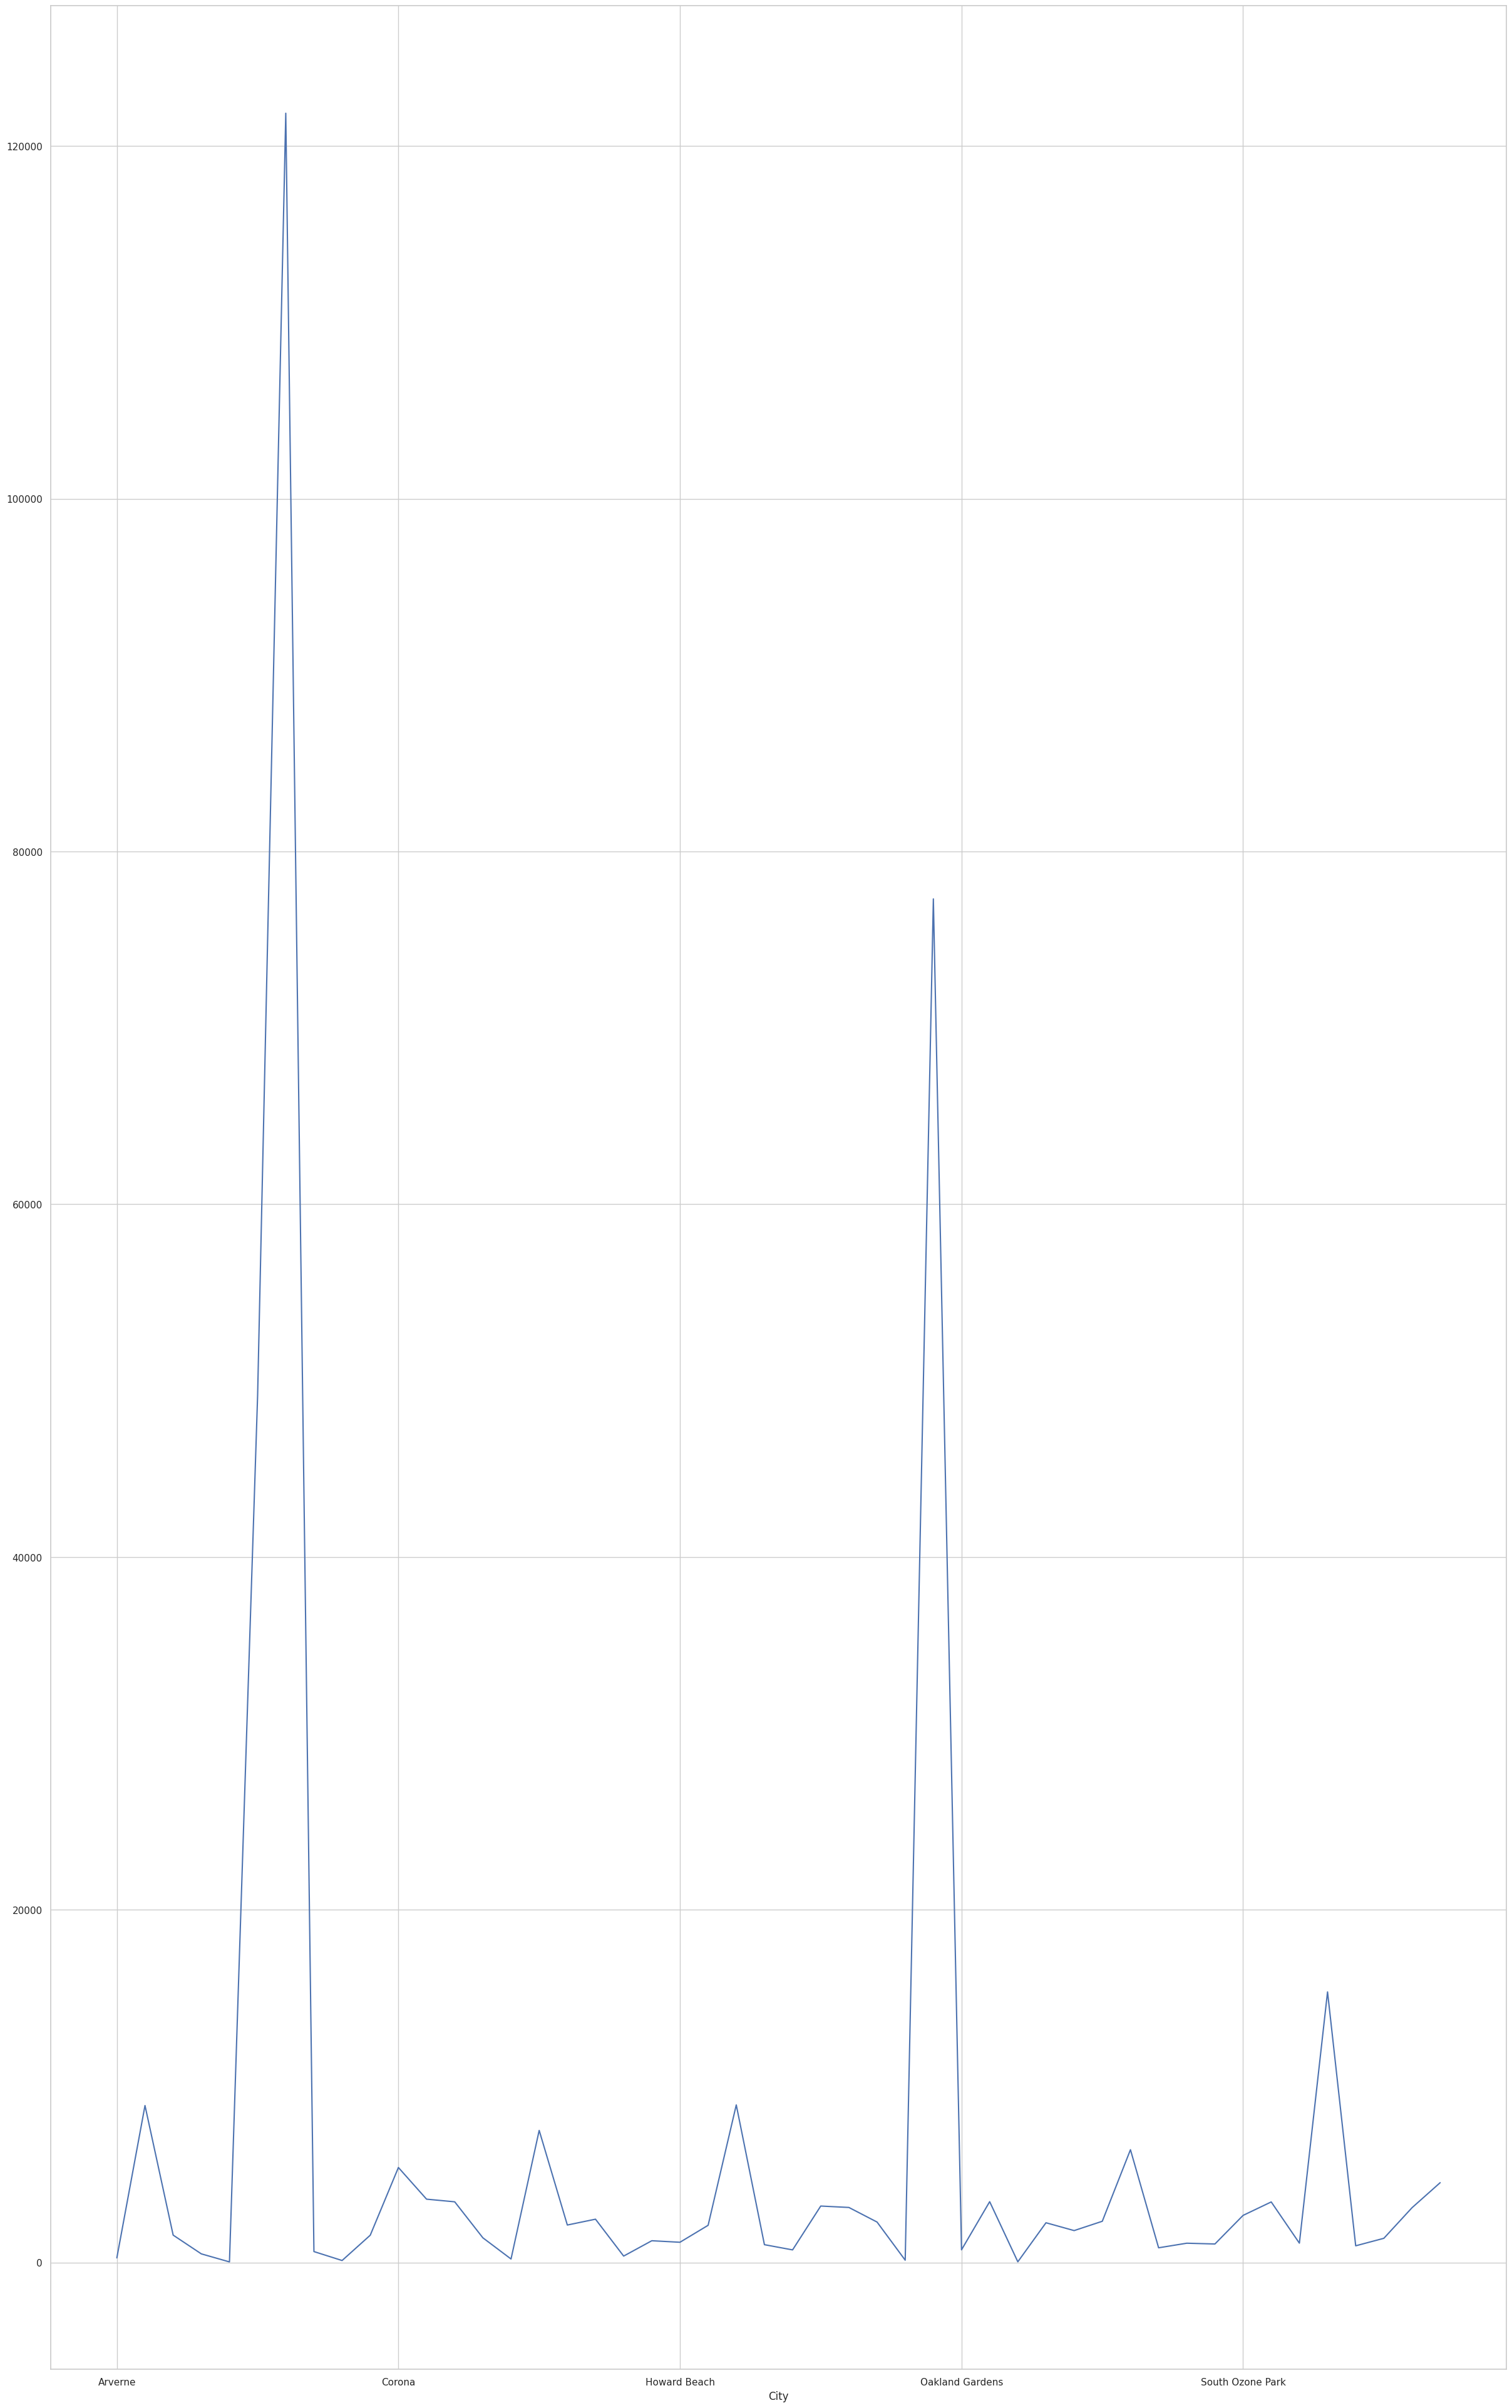

In [46]:
from matplotlib.pyplot import figure
figure(figsize=(30,50), dpi=100)
fd.plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Complaints Concentration in Brooklyn'}, xlabel='Longitude', ylabel='Latitude'>

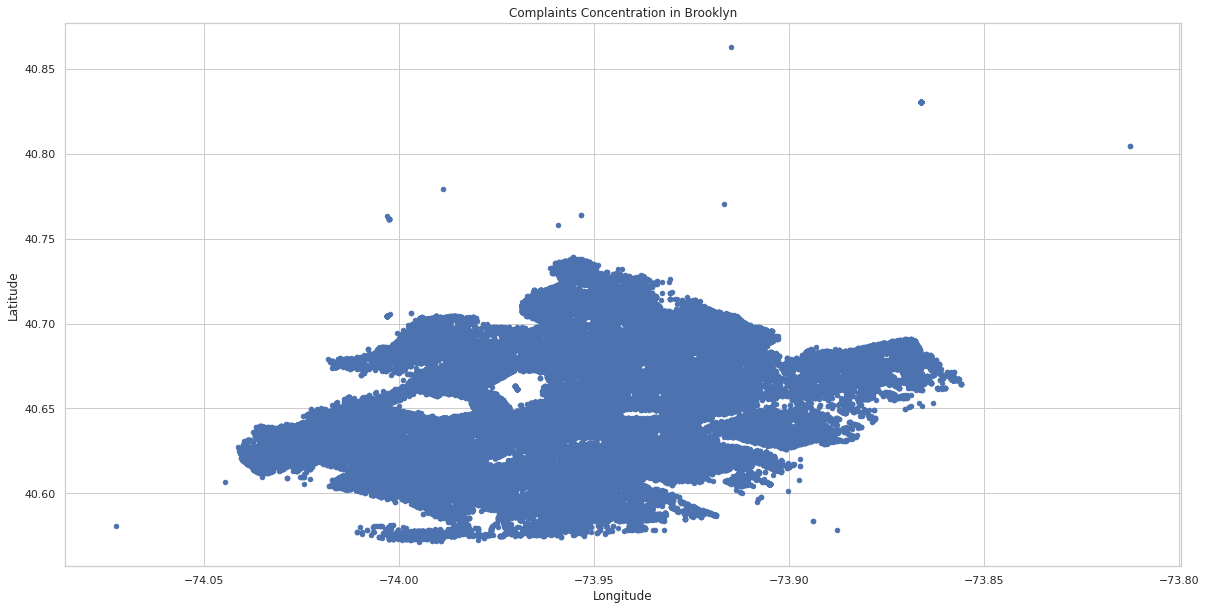

In [47]:
#Q2 4.	Draw scatter and hexbin plots for complaint concentration across Brooklyn
dfBrooklyn = df1a_clean.loc[df1a_clean['City'] == 'Brooklyn']
dfBrooklyn[['Longitude', 'Latitude']].plot(kind = 'scatter', x='Longitude', y='Latitude', title = 'Complaints Concentration in Brooklyn', figsize = (20, 10))

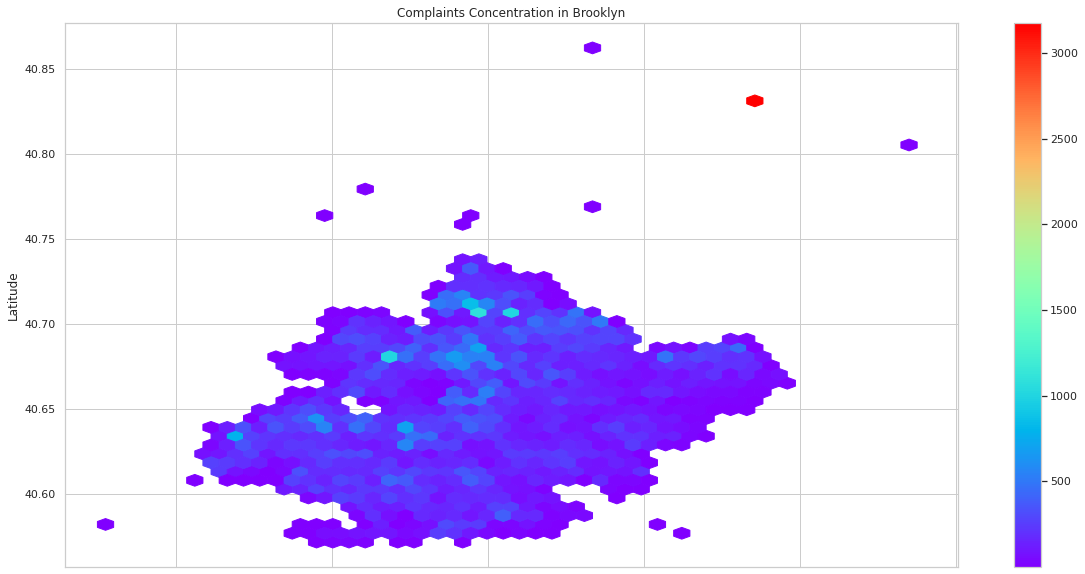

In [48]:
#hexbin plot
dfBrooklyn[['Longitude', 'Latitude']].plot(kind = 'hexbin', x='Longitude', y='Latitude', gridsize=50,
    cmap = 'rainbow', mincnt=1, title = 'Complaints Concentration in Brooklyn', figsize = (20, 10));


In [49]:
#Q 3. Find major types of complaints

#1.	Plot a bar graph of count vs. complaint types
# Display complaint types
# 2.	Find the top 10 types of complaintss
df1a_clean['Complaint Type'].value_counts()

Blocked Driveway             100881
Illegal Parking               92679
Noise - Street/Sidewalk       51692
Noise - Commercial            44109
Derelict Vehicle              21661
Noise - Vehicle               19352
Animal Abuse                  10541
Traffic                        5198
Homeless Encampment            4879
Vending                        4192
Noise - Park                   4109
Drinking                       1409
Noise - House of Worship       1070
Posting Advertisement           681
Urinating in Public             641
Bike/Roller/Skate Chronic       478
Panhandling                     327
Disorderly Youth                315
Illegal Fireworks               172
Graffiti                        157
Agency Issues                     8
Squeegee                          4
Ferry Complaint                   2
Animal in a Park                  1
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Major Type of Complaints'}>

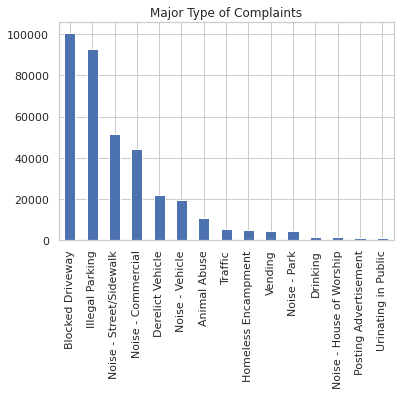

In [50]:
# we can see that the higher frequency is in the first 12 categories
df1a_clean['Complaint Type'].value_counts().head(15).plot(kind = 'bar', title = 'Major Type of Complaints')

<AxesSubplot:title={'center':'Major Type of Complaints'}>

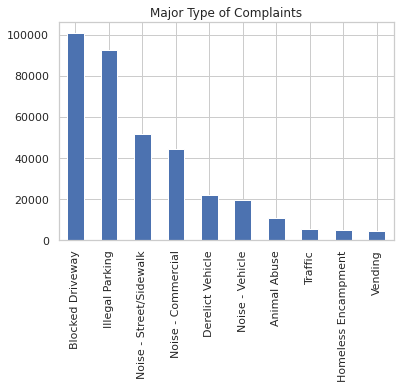

In [51]:
#Top 10 complaints
df1a_clean['Complaint Type'].value_counts().head(10).plot(kind = 'bar', title = 'Major Type of Complaints')

In [52]:

#Q3 3.	Display the types of complaints in each city in a separate dataset

df4=df1a_clean.groupby(['City', 'Complaint Type']).size()
df4.head(50)

City     Complaint Type           
Arverne  Animal Abuse                   46
         Blocked Driveway               50
         Derelict Vehicle               32
         Disorderly Youth                2
         Drinking                        1
         Graffiti                        1
         Homeless Encampment             4
         Illegal Parking                62
         Noise - Commercial              2
         Noise - House of Worship       14
         Noise - Park                    2
         Noise - Street/Sidewalk        29
         Noise - Vehicle                10
         Panhandling                     1
         Traffic                         1
         Urinating in Public             1
         Vending                         1
Astoria  Animal Abuse                  170
         Bike/Roller/Skate Chronic      16
         Blocked Driveway             3595
         Derelict Vehicle              440
         Disorderly Youth                5
         Drinking  

In [53]:
#Q4  Visualize the major types of complaints in each city

df5 = pd.crosstab(df1a_clean['City'],df1a_clean['Complaint Type'])
df5

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
Arverne,0,46,0,0,50,32,2,1,0,1,...,14,2,29,10,1,0,0,1,1,1
Astoria,0,170,0,16,3595,440,5,43,0,4,...,21,64,554,236,2,3,0,60,10,57
Bayside,0,53,0,0,514,231,2,1,0,3,...,3,4,17,24,0,0,0,9,0,2
Bellerose,0,15,0,1,138,120,2,1,0,0,...,1,1,13,11,1,1,0,9,1,0
Breezy Point,0,2,0,0,3,3,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
Bronx,0,1971,0,22,17063,2403,66,206,0,15,...,90,548,9146,3556,20,18,0,427,54,433
Brooklyn,8,3203,0,129,36780,6460,79,299,2,60,...,391,1601,14622,6024,52,59,0,1261,155,582
Cambria Heights,0,15,0,0,177,148,0,0,0,0,...,2,0,29,100,0,0,0,7,0,0
Central Park,0,0,0,0,0,0,0,0,0,0,...,0,0,105,0,0,0,0,0,0,0


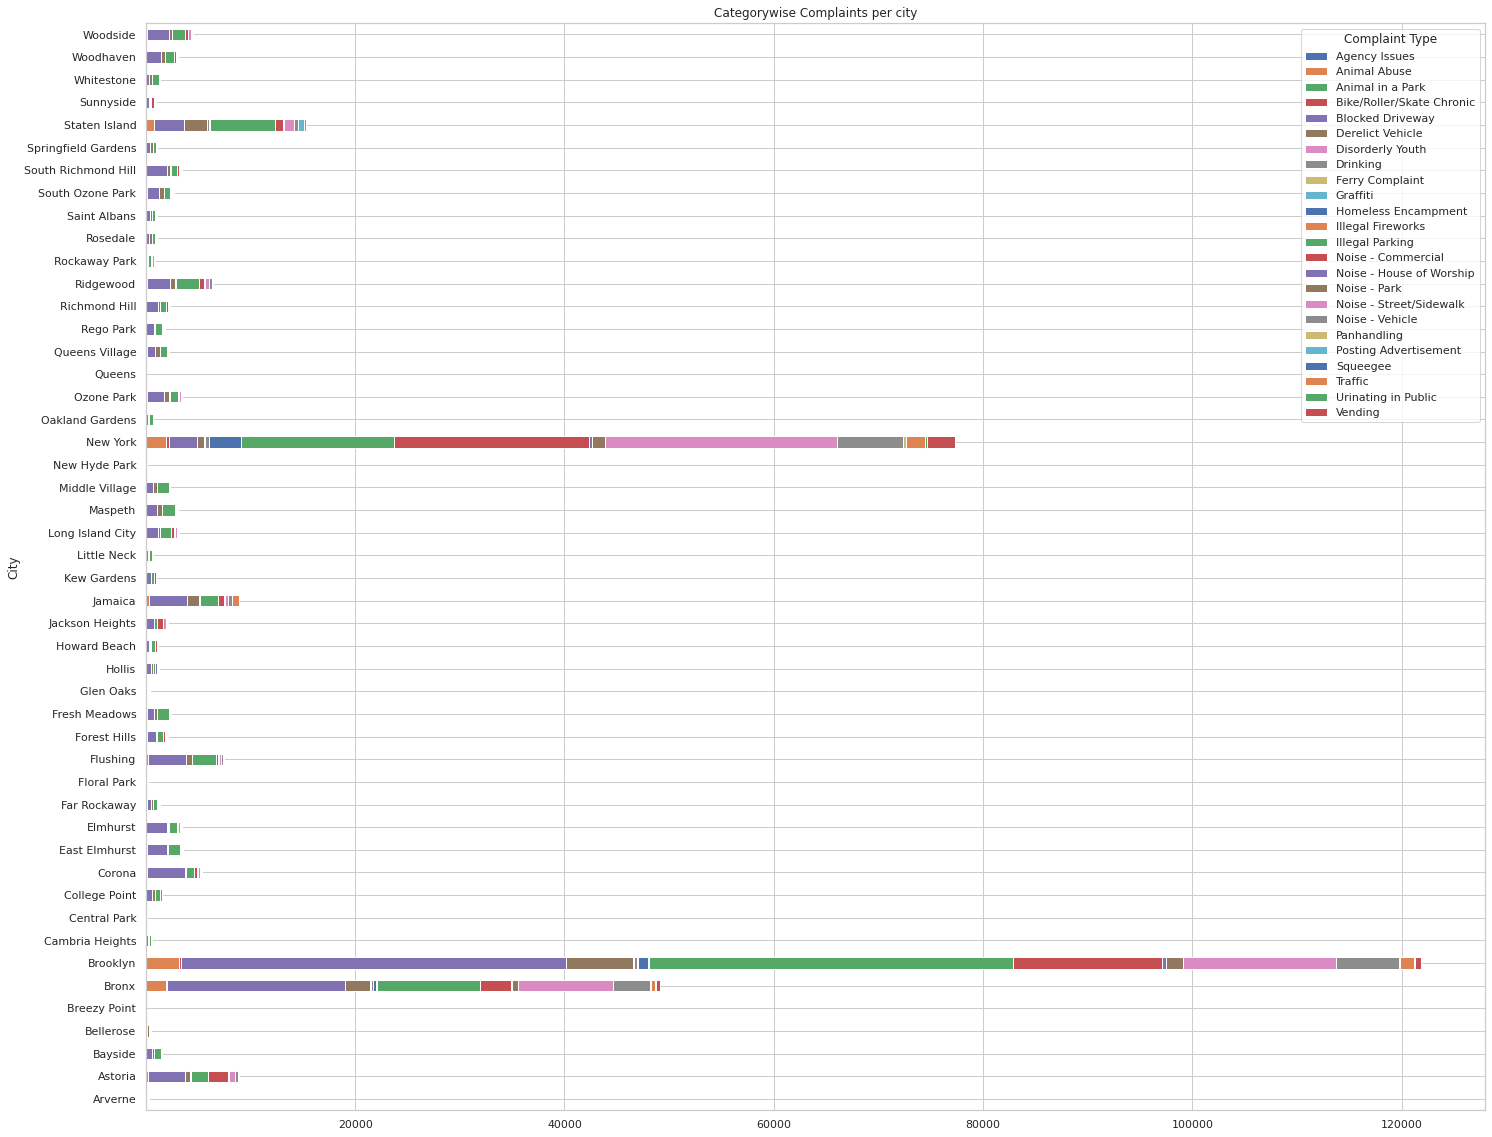

In [54]:
df5.plot(kind='barh',stacked=True,figsize=(24,20))
plt.title('Categorywise Complaints per city')
plt.show()

In [55]:
#Q5 is incomplete this question!!!!!!

In [56]:
#Q6 Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

In [61]:
import scipy.stats
from scipy.stats import chi2
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(df5)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

#no statistical significance between city and complaint type

chi2 statistic:     1.4085e+05
p-value:            0
degrees of freedom: 1081
expected frequencies:
 [[5.68359493e-03 7.48884677e+00 7.10449366e-04 ... 3.69291580e+00
  4.55398044e-01 2.97820374e+00]
 [1.95239166e-01 2.57252007e+02 2.44048958e-02 ... 1.26856648e+02
  1.56435382e+01 1.02305323e+02]
 [3.40137920e-02 4.48174227e+01 4.25172401e-03 ... 2.21004614e+01
  2.72535509e+00 1.78232270e+01]
 ...
 [3.00418589e-02 3.95839043e+01 3.75523236e-03 ... 1.95196978e+01
  2.40710395e+00 1.57419341e+01]
 [6.80934172e-02 8.97215889e+01 8.51167715e-03 ... 4.42436978e+01
  5.45598506e+00 3.56809506e+01]
 [9.92544396e-02 1.30780131e+02 1.24068050e-02 ... 6.44905721e+01
  7.95276197e+00 5.20093264e+01]]


In [62]:
# even though Q5 is not clear, I will examine whehter response time and complaint type are significant
#but first I need to fix the Date collumns
#Q2 2 answer
df1a_clean['Created Date']= pd.to_datetime(df1a_clean['Created Date'])

In [63]:
df1a_clean['Closed Date']= pd.to_datetime(df1a_clean['Closed Date'])

In [65]:
df1a_clean['Response Time']= df1a_clean['Closed Date'].values-df1a_clean['Created Date'].values
df1a_clean

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location,Request_Closing_Time,Response Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:30,0 days 00:55:30
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:27:13,0 days 01:27:13
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:34,0 days 04:51:34
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:27,0 days 07:45:27
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:44,0 days 03:27:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,29609918,2015-01-01 00:04:44,2015-01-01 10:22:31,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)",0 days 10:17:47,0 days 10:17:47
364554,29608392,2015-01-01 00:04:28,2015-01-01 02:25:02,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)",0 days 02:20:34,0 days 02:20:34
364555,29607589,2015-01-01 00:01:30,2015-01-01 00:20:33,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)",0 days 00:19:03,0 days 00:19:03
364556,29610889,2015-01-01 00:01:29,2015-01-01 02:42:22,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,N,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)",0 days 02:40:53,0 days 02:40:53


In [66]:
df6 = pd.crosstab(df1a_clean['Response Time'],df1a_clean['Complaint Type'])
df6

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
Response Time,,,,,,,,,,,,,,,,,,,,,
-113 days +16:56:45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-113 days +21:14:43,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
-111 days +01:59:07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-111 days +08:27:59,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
-111 days +12:03:36,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250 days 19:33:57,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250 days 23:47:33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251 days 00:58:43,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
import scipy.stats
from scipy.stats import chi2
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(df6)
 
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     1.9302e+06
p-value:            0
degrees of freedom: 1346949
expected frequencies:
 [[2.19443820e-05 2.89144663e-02 2.74304775e-06 ... 1.42583622e-02
  1.75829360e-03 1.14988561e-02]
 [2.19443820e-05 2.89144663e-02 2.74304775e-06 ... 1.42583622e-02
  1.75829360e-03 1.14988561e-02]
 [2.19443820e-05 2.89144663e-02 2.74304775e-06 ... 1.42583622e-02
  1.75829360e-03 1.14988561e-02]
 ...
 [2.19443820e-05 2.89144663e-02 2.74304775e-06 ... 1.42583622e-02
  1.75829360e-03 1.14988561e-02]
 [2.19443820e-05 2.89144663e-02 2.74304775e-06 ... 1.42583622e-02
  1.75829360e-03 1.14988561e-02]
 [2.19443820e-05 2.89144663e-02 2.74304775e-06 ... 1.42583622e-02
  1.75829360e-03 1.14988561e-02]]


In [ ]:
# not significant at all.